<a href="https://colab.research.google.com/github/azazeeel/mlt/blob/main/Group_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Packages

In [ ]:
import os
import cv2
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import pytz
from datetime import datetime 


In [ ]:
# LOAD IMAGE
def load_image(image_file):
    image_data = cv2.imread(image_file)
    output = cv2.resize(image_data, (512,512))
    return output

# RESIZE
def resize_func(image_data, target_dir, index):
    output = cv2.resize(image_data, (256,256))
    cv2.imwrite(os.path.join("%s/img_%05d.jpg"%(target_dir ,index)), output)
    return output

In [ ]:
# BRIGHTNESS
def brightness_func(image_data, target_dir, index):
    for i in range(1,41):
        factor = i*2 +70
        enhanced = Image.fromarray(np.uint8(image_data))
        enhanced = ImageEnhance.Brightness(enhanced).enhance(factor/100)
        enhanced = np.asarray(enhanced)
        output = resize_func(enhanced, target_dir, index) 
        index += 1
    return index

In [ ]:
# TRANSLATE
def translate_func(image_data, target_dir, index):
    position_y = -32
    for i in range(0,33):
        position_x = -32
        for j in range(0,33):
            scale_fit = max(abs(position_x), abs(position_y))
            M = np.float32([[1, 0, position_x], [0, 1, position_y]])
            shifted = cv2.warpAffine(image_data, M, (512, 512))
            shifted = shifted[0+scale_fit:512-scale_fit, 0+scale_fit:512-scale_fit] # Not mandatory
            output = resize_func(shifted, target_dir, index)
            position_x += 2
            index += 1
        position_y += 2
    return index

In [ ]:
# ZOOM
def zoom_func(image_data, target_dir, index):
    scale_fit = 0
    for i in range(0,20):
        scaled = image_data[0+scale_fit:512-scale_fit, 0+scale_fit:512-scale_fit]
        output = resize_func(scaled, target_dir, index)
        scale_fit += 4
        index += 1
    return index

In [ ]:
# ROTATE
def rotate_func(image_data, target_dir, index):
    scale_fit = 32
    for i in range(-10,11):
        M = cv2.getRotationMatrix2D((512/2, 512/2), i, 1.0)
        rotated = cv2.warpAffine(image_data, M, (512, 512))
        rotated = rotated[0+scale_fit:512-scale_fit, 0+scale_fit:512-scale_fit] # Not mandatory
        output = resize_func(rotated, target_dir, index)
        index += 1
    return index

# Prepare Folders

In [ ]:
'''
!rm -rf './temp'
!rm -rf './resize'
!rm -rf './brightness'
!rm -rf './translate'
!rm -rf './zoom'
!rm -rf './rotate'
!rm -rf './Data'
'''

"\n!rm -rf './temp'\n!rm -rf './resize'\n!rm -rf './brightness'\n!rm -rf './translate'\n!rm -rf './zoom'\n!rm -rf './rotate'\n!rm -rf './Data'\n"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf './dataset'
os.mkdir('./dataset')
os.mkdir('./dataset/alphabets') # The output file will be put here
datasets_dir = "Citra BISINDO"
shutil.unpack_archive('/content/drive/MyDrive/MLDTS/Group/BahasaIsyaratIndo.zip', '')

Mounted at /content/drive


# Image Augmentation

In [ ]:
UTC = pytz.utc
timeJKT = pytz.timezone('Asia/Jakarta') 
start_time = datetime.now(timeJKT).replace(microsecond=0)

In [ ]:
for label in sorted(os.listdir(datasets_dir)):
    os.mkdir(f'./dataset/alphabets/{label}')
    target_dir = f'./dataset/alphabets/{label}'
    index = 1
    print(label)
    for image_file in sorted(os.listdir(f'{datasets_dir}/{label}')):
        image_dir = f'{datasets_dir}/{label}/{image_file}'
        image_data = load_image(image_dir)
        
        # Use all types of augmentation (the order doesn't matter)
        index = brightness_func(image_data, target_dir, index)
        index = translate_func(image_data, target_dir, index)
        index = zoom_func(image_data, target_dir, index)
        index = rotate_func(image_data, target_dir, index)
        
        # Use only the types of augmentation needed
#         index = translate_func(image_data, target_dir, index)
#         index = rotate_func(image_data, target_dir, index)

        # Use 1 type of augmentation multiple times
#         index = brightness_func(image_data, target_dir, index)
#         index = brightness_func(image_data, target_dir, index)

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [ ]:
end_time = datetime.now(timeJKT).replace(microsecond=0)
print("Start Time    : %s"%start_time)
print("End Time      : %s"%end_time)
print("Total Duration: ",end_time - start_time)
print(f'Augmented per raw image: {int((index-1) /12)} images')
print(f'Augmented per alphabet: {index-1} images')
print(f'Total augmented image: {(index-1) *26} images')

Start Time    : 2022-07-09 12:03:12+07:00
End Time      : 2022-07-09 12:32:18+07:00
Total Duration:  0:29:06
Augmented per raw image: 1170 images
Augmented per alphabet: 14040 images
Total augmented image: 365040 images


# Review Output

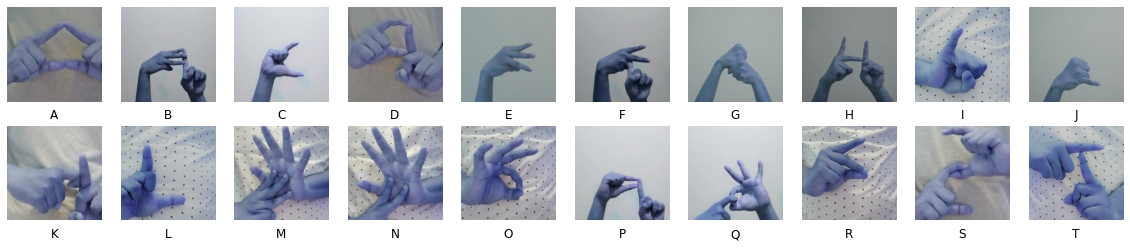

In [ ]:
sample_images = []

for folder in sorted(os.listdir('./dataset/alphabets')):
    for image_inside in os.listdir(f'./dataset/alphabets/{folder}'):
        selector = random.randint(1, index-1)
        temp_img = cv2.imread(f'./dataset/alphabets/{folder}/img_{selector:05}.jpg')
        sample_images.append(temp_img)
        break



row = 2
col = 10
fig = plt.figure(figsize = (col*2,row*2))
for load_samples in range(0,row*col):
    fig.add_subplot(row, col, load_samples+1)
    plt.axis('off')
    plt.imshow(sample_images[load_samples])
    label = chr(load_samples+65)
    plt.title(label, y=-0.25)
plt.show()